In [1]:
import os
import numpy
import matplotlib
import matplotlib.pyplot
import io

import scipy
import scipy.ndimage
import scipy.stats

In [2]:
def cut_string_between(string, begin_mark, end_mark):
    #print((string.split(begin_mark)[1]))
    return (string.split(begin_mark)[1]).split(end_mark)[0]

In [3]:
def extract_data(dat, rem_data=[]):
    
    SEQ_IDENTIFIER_BEG = '<'
    SEQ_IDENTIFIER_END = '>'
    PAR_IDENTIFIER_BEG = '('
    PAR_IDENTIFIER_END = ')'
    DAT_IDENTIFIER_BEG = '['
    DAT_IDENTIFIER_END = ']'
    
    output_data = dict.fromkeys(range(1,11))
    accel_format = ['X', 'Y', 'Z']
    axis_format = ['val', 't']
    
    for okey in output_data.keys():
        output_data[okey] = dict.fromkeys(accel_format)
        for akey in output_data[okey].keys():
            output_data[okey][akey] = dict.fromkeys(axis_format)
            for axkey in output_data[okey][akey].keys():
                output_data[okey][akey][axkey] = []
            
   
    for i in range(0, len(data)):
        line = dat[i]
        
        if (line==''):
            continue
                
        begseq = cut_string_between(line, SEQ_IDENTIFIER_BEG, SEQ_IDENTIFIER_END)
        
        if (begseq == 'DATA'):
            params_string = cut_string_between(line, PAR_IDENTIFIER_BEG, PAR_IDENTIFIER_END)
            params_list = params_string.split(',')
            
            timestamp = float(params_list[0].split('=')[1])
            accel = int(params_list[1].split('=')[1])
            axis = params_list[2].split('=')[1]
            freq = int(params_list[3].split('=')[1])
            nb_datapoints = int(params_list[4].split('=')[1])

            # print('Accel n{}, axis = {}'.format(accel, axis))
            raw_data = cut_string_between(line, DAT_IDENTIFIER_BEG, DAT_IDENTIFIER_END)
            raw_data = raw_data.replace(' ', '')
            raw_data = [float(x) for x in raw_data.split(',')]
            
            timestamps = [timestamp + t/freq*1000 for t in range(nb_datapoints)]
            #print(timestamps)
            
            for index in rem_data:
                timestamps.pop(index)
                raw_data.pop(index)
            
            output_data[accel][axis]['val'] = output_data[accel][axis]['val'] + raw_data
            output_data[accel][axis]['t'] = output_data[accel][axis]['t'] + timestamps
            
    return output_data

In [4]:
def plot_accelerations(acc_data):
    N_max = -1
    for acc in acc_data.keys():
        matplotlib.pyplot.figure(figsize=(17, 8))
        matplotlib.pyplot.plot(acc_data[acc]['X']['t'][:N_max], acc_data[acc]['X']['val'][:N_max], 'r', label='X')
        matplotlib.pyplot.plot(acc_data[acc]['Y']['t'][:N_max], acc_data[acc]['Y']['val'][:N_max], 'b', label='Y')
        matplotlib.pyplot.plot(acc_data[acc]['Z']['t'][:N_max], acc_data[acc]['Z']['val'][:N_max], 'g', label='Z')
        matplotlib.pyplot.grid()
        matplotlib.pyplot.ylim([-2*9.81, 2*9.81])
        
        matplotlib.pyplot.title('Acc'+str(acc))
        matplotlib.pyplot.xlabel('time [ms]')
        matplotlib.pyplot.ylabel('Acceleration [m/s^-2]')
        matplotlib.pyplot.legend()
        matplotlib.pyplot.savefig('plots/Acc'+str(acc))

In [5]:
def compute_fft():
    pass

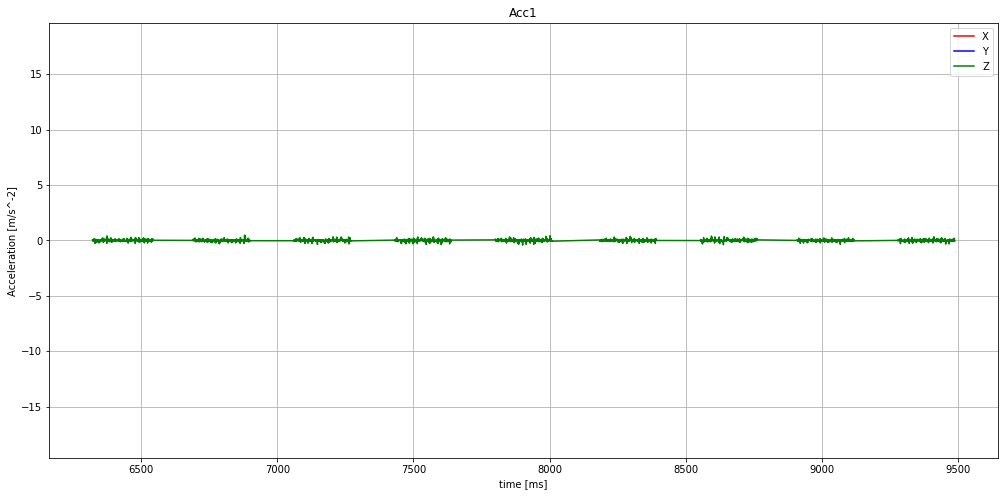

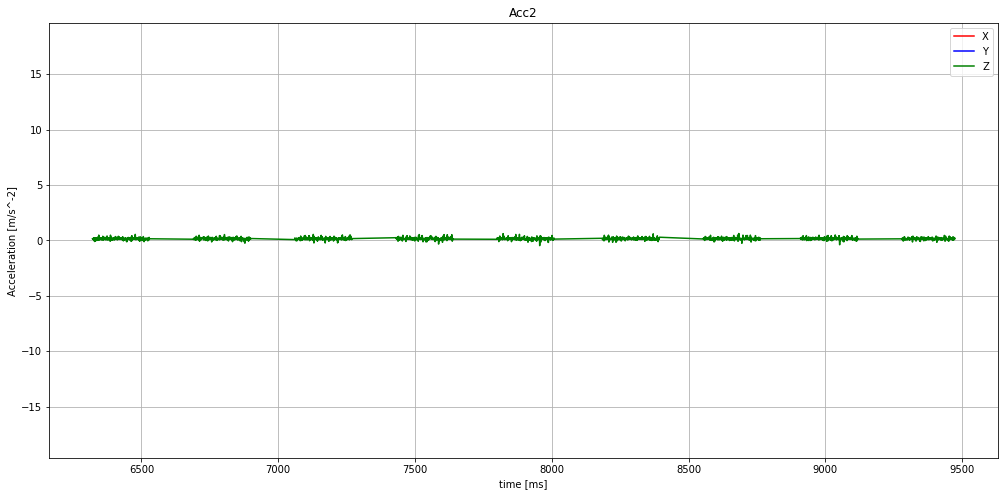

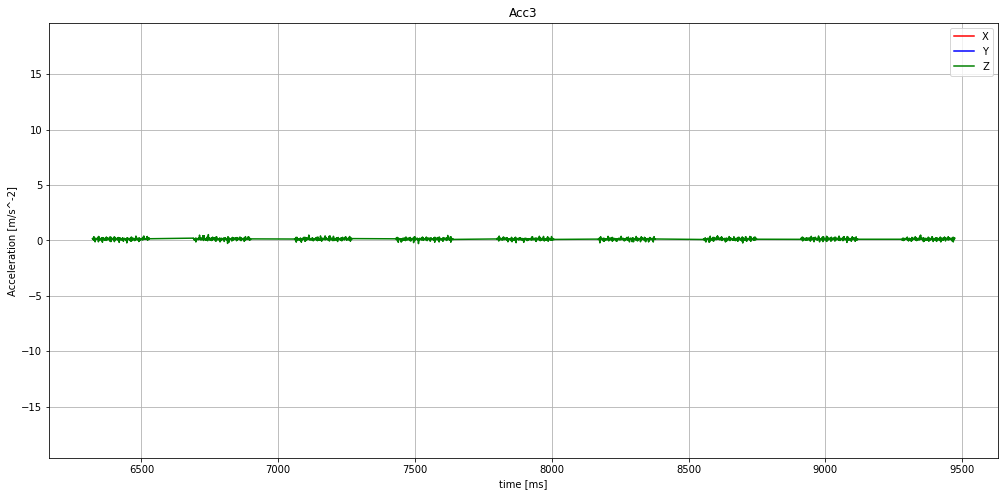

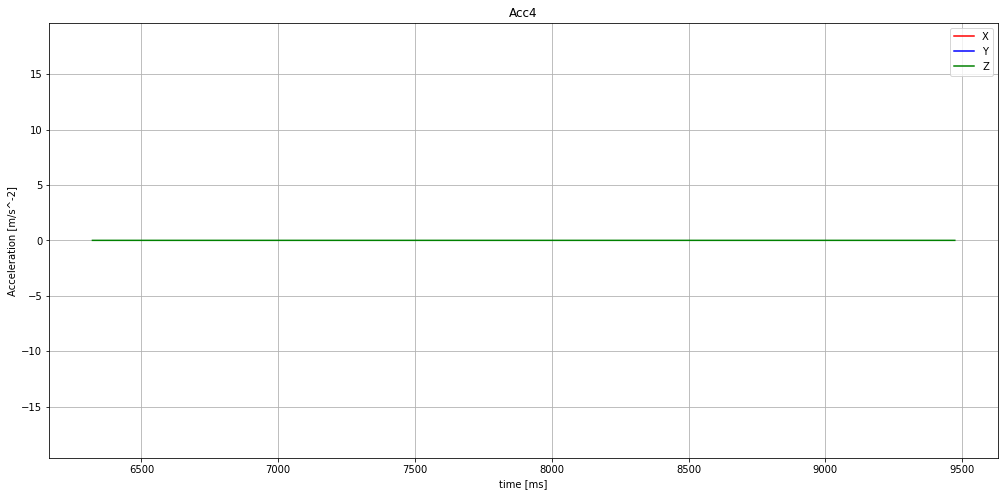

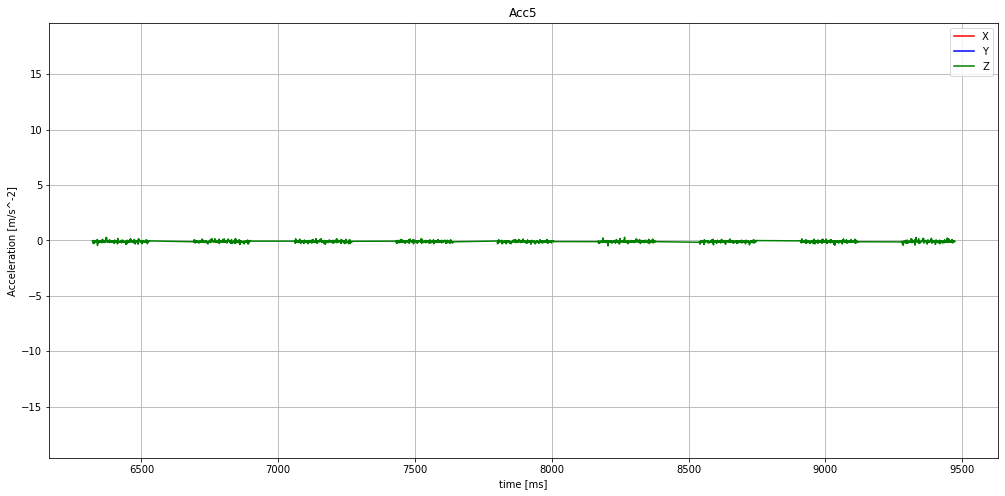

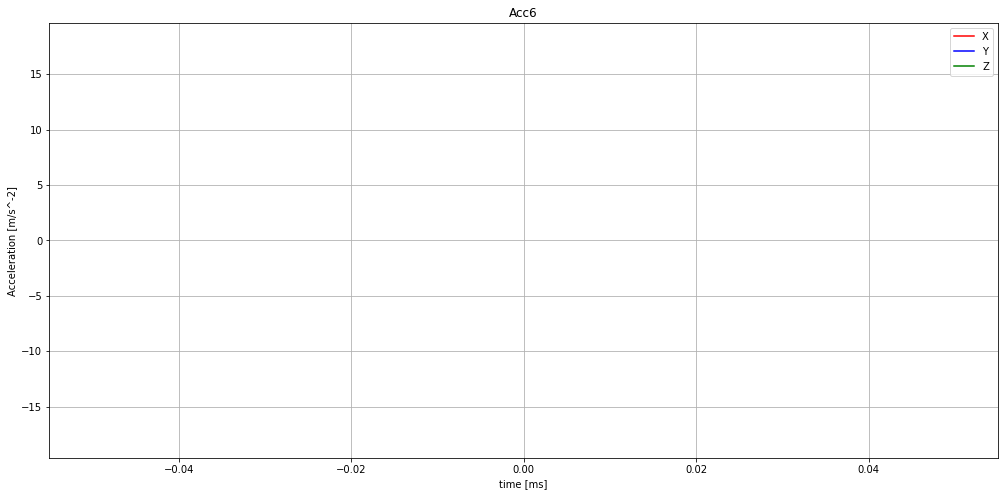

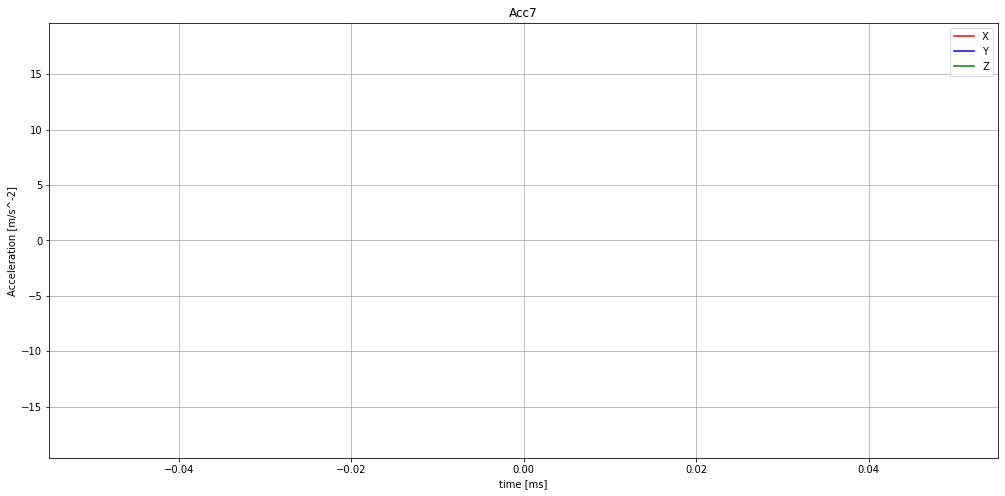

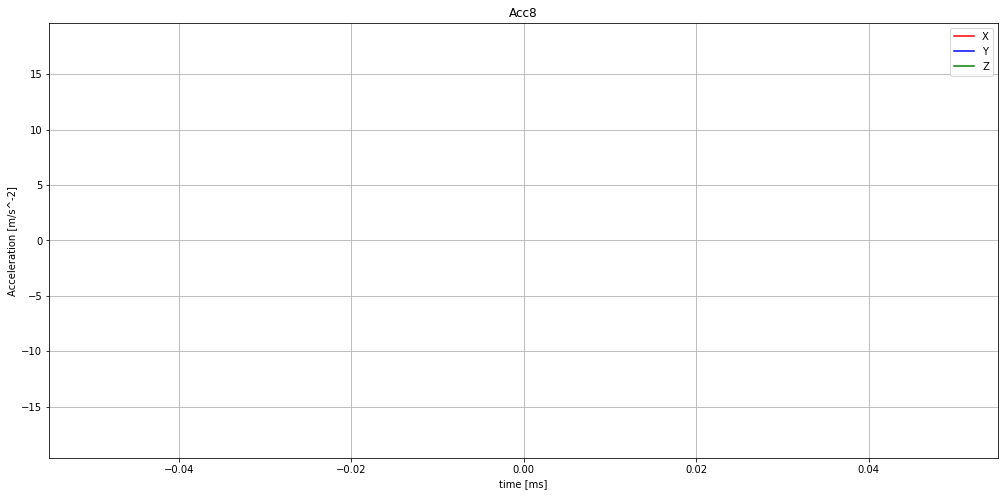

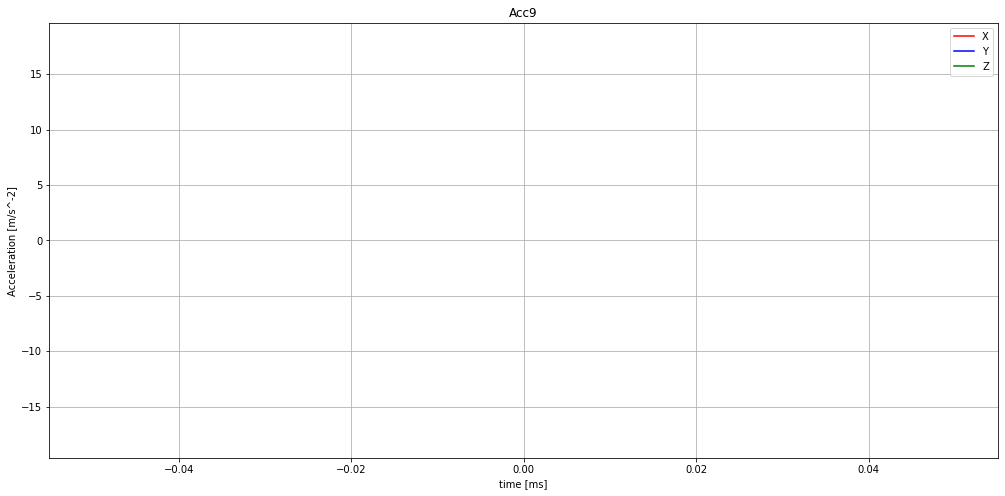

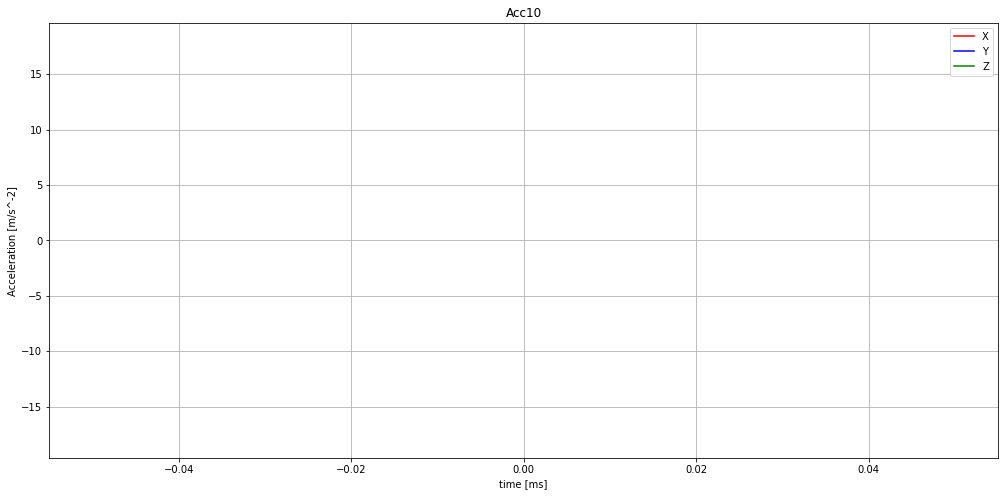

In [7]:
filename = './DataHandling/junk/log.txt'
log_file = io.open(filename, mode='r')
data = log_file.read().split('\n')
log_file.close()

raw_acc_data = extract_data(data)
plot_accelerations(raw_acc_data)